In [ ]:
#hypothesis 3: 3.	Higher blood glucose levels are correlated with diabetes diagnosis.
#                   •	Individuals with fasting glucose levels above 120 mg/dL have a higher probability of diabetes.


In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/jacobambat/dev/Diabetes_DA_project/jupyter_notebooks'

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [4]:
DestinationFolder = "dataset/cleaned"

In [5]:
# Importing the Pandas library
import pandas as pd

# Loading the dataset
df = pd.read_csv(f'{DestinationFolder}/datacleanup2.csv')

# Displaying the first few rows of the dataset
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,AGE
0,Female,61.0,1,1,ever,32.36,5.8,130,0,61
1,Male,44.0,0,0,not current,30.49,3.5,130,0,44
2,Male,23.0,0,0,never,34.55,6.1,90,0,23
3,Male,68.0,1,1,current,27.32,8.8,155,1,68
4,Female,24.0,0,0,former,21.63,6.1,126,0,24


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [11]:
# Categorizing High HbA1c (≥6.5%) vs Normal
df["High_blood_glucose_level"] = df["blood_glucose_level"].apply(lambda x: 1 if x > 120 else 0)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,AGE,High_blood_glucose_level
0,Female,61.0,1,1,ever,32.36,5.8,130,0,61,1
1,Male,44.0,0,0,not current,30.49,3.5,130,0,44,1
2,Male,23.0,0,0,never,34.55,6.1,90,0,23,0
3,Male,68.0,1,1,current,27.32,8.8,155,1,68,1
4,Female,24.0,0,0,former,21.63,6.1,126,0,24,1
...,...,...,...,...,...,...,...,...,...,...,...
9806,Male,67.0,0,0,never,35.95,6.5,160,0,67,1
9807,Female,13.0,0,0,never,19.66,3.5,155,0,13,1
9808,Male,14.0,0,0,No Info,18.95,6.0,158,0,14,1
9809,Male,2.0,0,0,No Info,14.66,6.5,160,0,2,1


Correlation between Blood glucose level and Diabetes:
                      blood_glucose_level  diabetes
blood_glucose_level             1.000000  0.283485
diabetes                        0.283485  1.000000


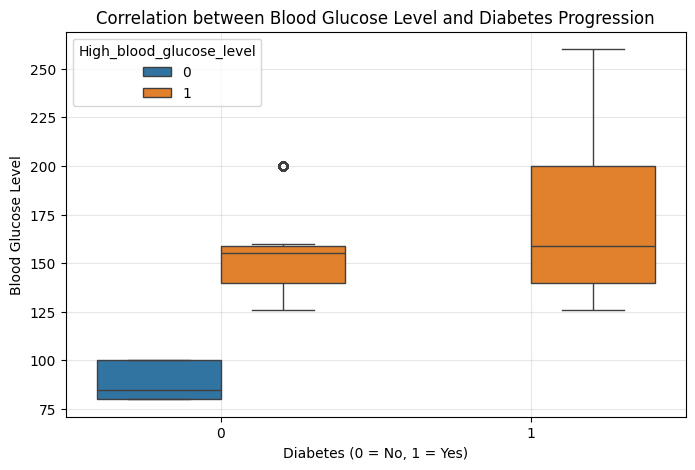

In [12]:
# Check Pearson correlation between blood glucose level and diabetes progression
correlation = df[['blood_glucose_level', 'diabetes']].corr()
print("Correlation between Blood glucose level and Diabetes:\n", correlation)

# Seaborn - Box plot to visualize the relationship
plt.figure(figsize=(8,5))
sns.boxplot(x=df["diabetes"], y=df["blood_glucose_level"], hue=df["High_blood_glucose_level"])
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Blood Glucose Level")
plt.title("Correlation between Blood Glucose Level and Diabetes Progression")
plt.grid(alpha=0.3)
plt.show()

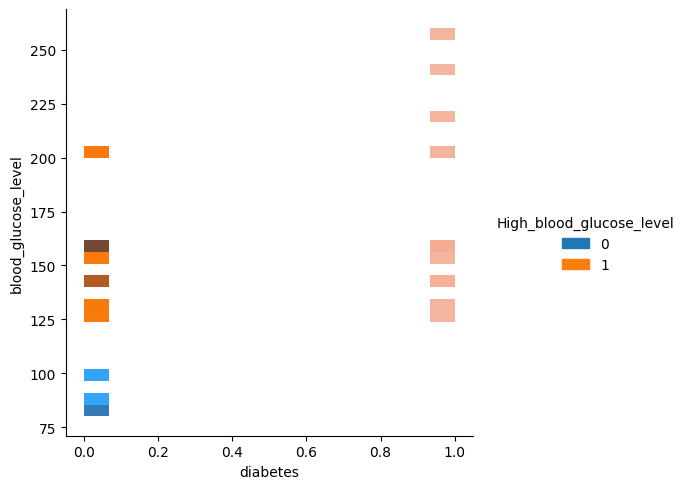

In [15]:
# seaborn displot
sns.displot(data=df, x='diabetes', y='blood_glucose_level', hue='High_blood_glucose_level')
plt.show()

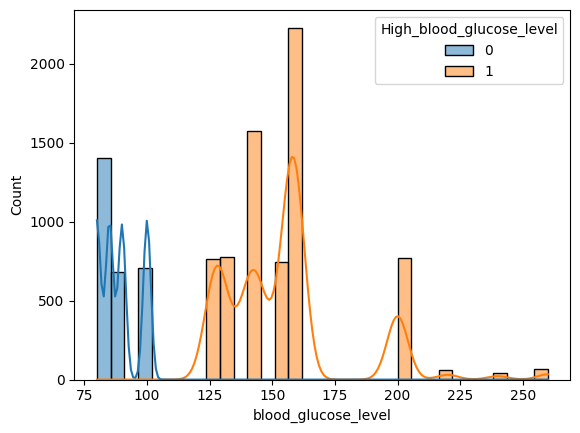

In [16]:
# seaborn - histplot
sns.histplot(data=df, kde=True, x='blood_glucose_level', hue='High_blood_glucose_level')
plt.show()

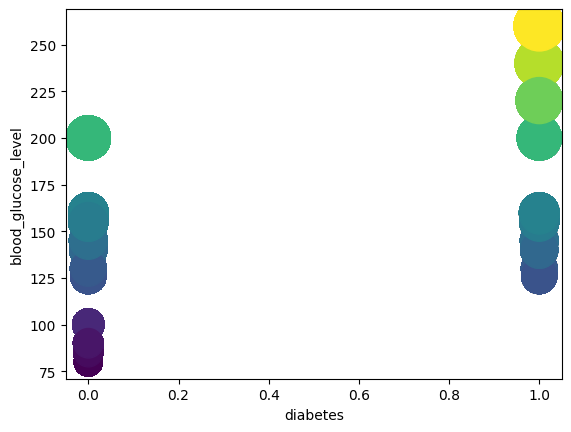

In [19]:
# Matplotlib - scatterplot
x, y = 'diabetes' , 'blood_glucose_level'
plt.scatter(data=df, x=x, y=y, c=y, s=df[y]*5)
plt.ylabel(y)
plt.xlabel(x)
plt.show()

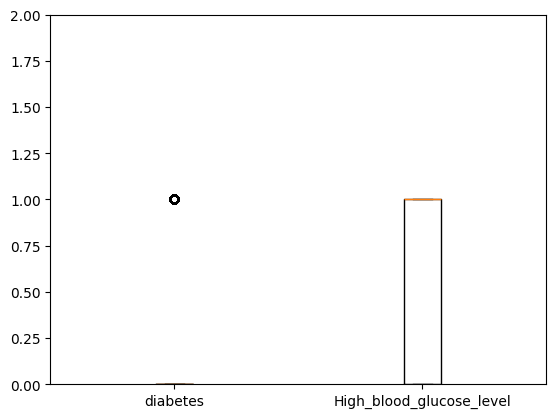

In [33]:
# matplotlib - boxplot
list_of_data = []
col_boxplot = ['diabetes', 'High_blood_glucose_level']
for col in col_boxplot:
  list_of_data.append(df[col])

plt.boxplot(x=list_of_data)
plt.xticks(np.arange(1,len(col_boxplot)+1), col_boxplot)
plt.ylim(0,2)
plt.show()

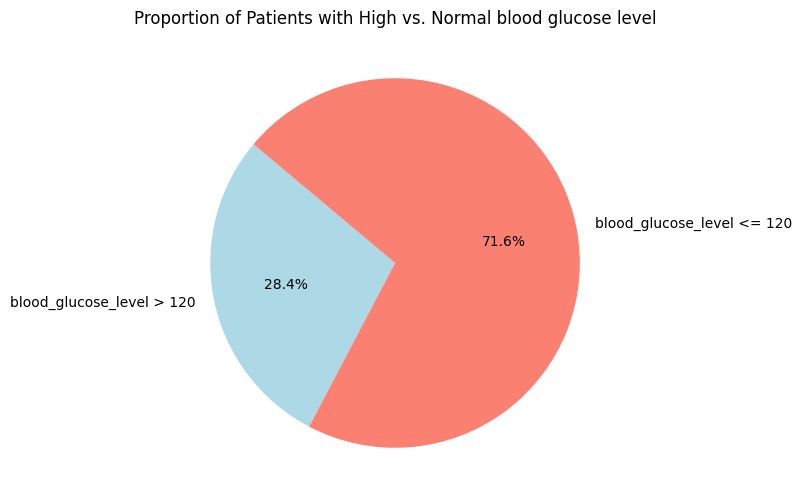

In [35]:
#Matplotlib - piechart: Proportion of Patients with High vs. Normal blood glucose level
plt.figure(figsize=(6, 6))
labels = ["blood_glucose_level > 120", "blood_glucose_level <= 120"]
sizes = df["High_blood_glucose_level"].value_counts().sort_index()
colors = ["lightblue", "salmon"]
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140)
plt.title("Proportion of Patients with High vs. Normal blood glucose level")
plt.show()

In [38]:
#Plotly - scatterplot
fig = px.scatter(data_frame=df, x="diabetes", y="blood_glucose_level")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [39]:
#Plotly - Area plot
fig = px.area(df,x='diabetes', y='blood_glucose_level', color='High_blood_glucose_level')
fig.show()

In [41]:
#plotly - boxplot
fig = px.box(df, x="diabetes", y="blood_glucose_level", color="High_blood_glucose_level")
fig.show()